# Ensemble methods Exercise

Test the implementation of various ensemble learning methods and and compare them with non-aggregated models.

Suggested methods:
- Random Forest
    - `sklear`: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Gradient Boosting
    - `xgboost`: https://xgboost.readthedocs.io/en/stable/python/python_intro.html
    - `lightgbm`: https://lightgbm.readthedocs.io/en/latest/Python-Intro.html

## Exercise objectives
- learn the different libraries APIs and train the models
- compare performance between themselves and previous classifiers/regressors
    - ROC/AUC (classification)
    - accuracy (regression)
    - training times

The suggested setup is to do it on the previous lecture's dataset and compare the results on the decision trees that you trained there.


In [31]:
import xgboost as xgb
import lightgbm as lgb
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [14]:
data = pd.read_csv('data/Aleph_dataset.csv', index_col=0)  # Assuming 'data.csv' is the dataset you want to work with

label = 'isb' 
columns = data.columns
feature_columns = columns[columns != label]

data.head()

,energy,cTheta,phi,prob_b,spheri,pt2rel,multip,bqvjet,ptlrel,isb
id,,,,,,,,,,
0,46.8299,0.3871,0.8528,0.0327,0.2105,0.0302,0.4776,0.0314,-0.0003,0.0
1,45.6397,-0.3943,-2.2817,0.0035,0.3457,0.0314,0.3497,0.0106,-0.0003,0.0
2,48.8960,-0.4613,-0.6139,0.0649,0.0872,0.0254,0.1288,0.1074,-0.0003,0.0
3,39.1577,0.4668,2.4818,0.0027,0.1570,0.0147,0.2732,0.2117,0.0240,0.0
4,43.7354,-0.7642,1.7872,0.4320,0.4873,0.0505,0.3536,0.4578,-0.0003,1.0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_columns], data[label], shuffle=True, random_state=42, test_size=0.25)


### Train models

Random Forest model trained with accuracy: 0.91
Length of fpr: 101
XGBoost model trained with accuracy: 0.90
Length of fpr: 1280
LightGBM model trained with accuracy: 0.91
Length of fpr: 1244


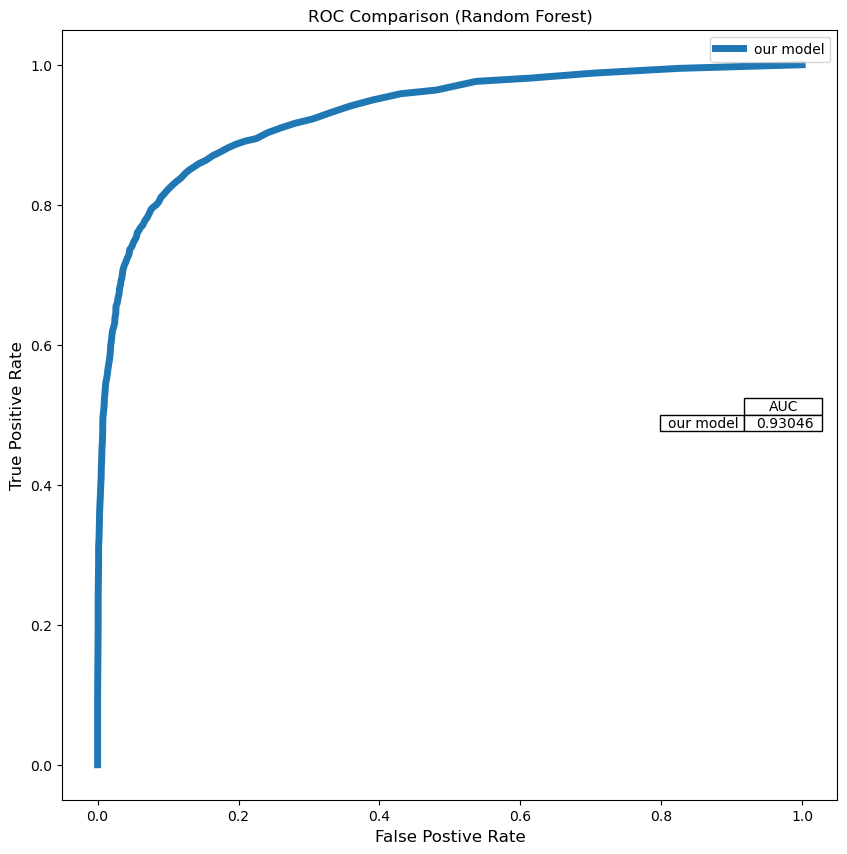

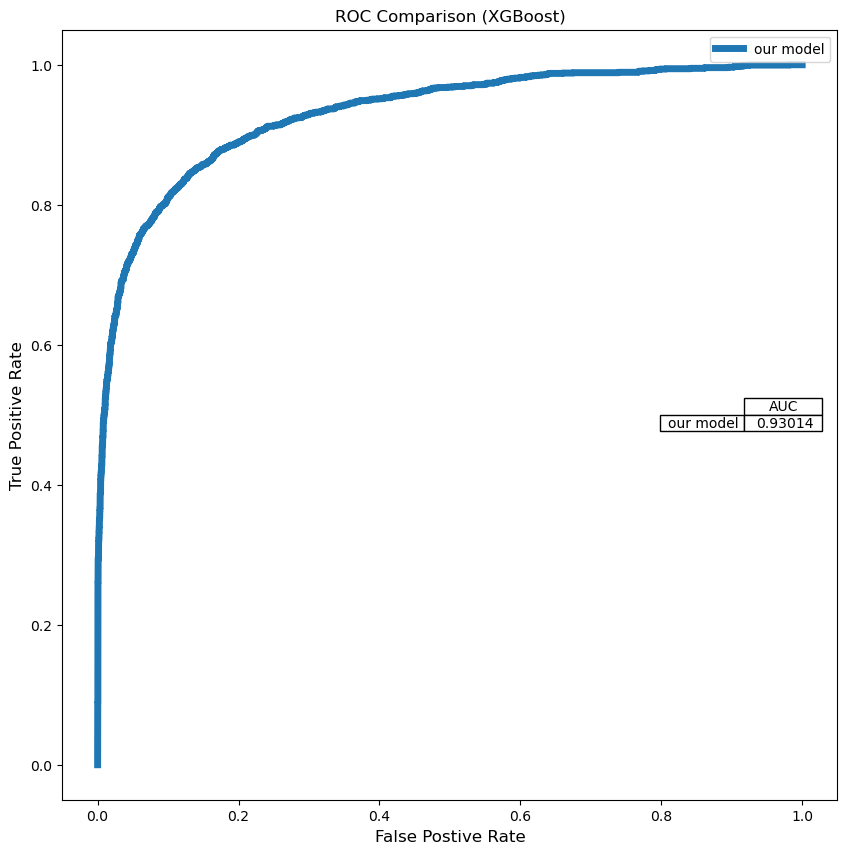

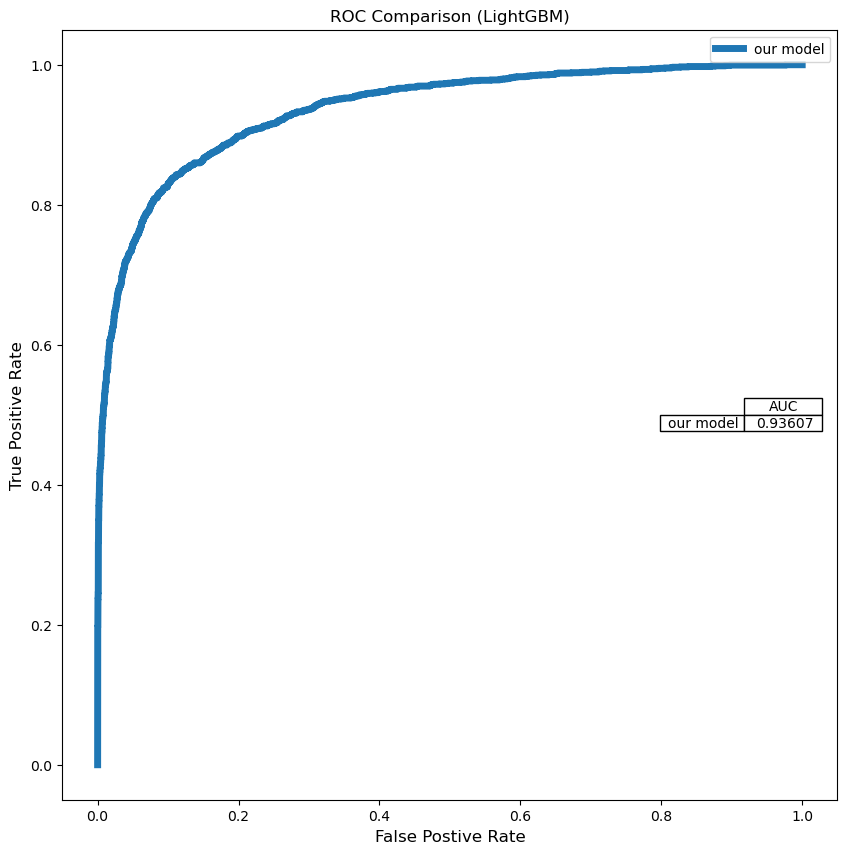

In [ ]:
rfcModel = sk.ensemble.RandomForestClassifier().fit(X_train, y_train)
xgbModel = xgb.XGBClassifier().fit(X_train, y_train)
lgbModel = lgb.LGBMClassifier(verbosity=0).fit(X_train, y_train)

models = {
    'Random Forest': rfcModel,
    'XGBoost': xgbModel,
    'LightGBM': lgbModel
}

for name, model in models.items():
    print(f"{name} model trained with accuracy: {model.score(X_test, y_test):.2f}")
    predictions = model.predict_proba(X_test)

    fpr, tpr, _ = roc_curve(y_test, predictions[:, 1])
    print(f"Length of fpr: {len(fpr)}")
    auc_data = auc(fpr, tpr)

    fig = plt.figure(figsize = [10,10])
    plt.title(f'ROC Comparison ({name})', size = 12)
    plt.plot(fpr,tpr, label = 'our model', linewidth=5)

    plt.legend()
    plt.xlabel('False Postive Rate', size = 12)
    plt.ylabel('True Positive Rate', size = 12)

    # Plots a table with the AUC-scores.
    row_labels=['our model']
    table_vals=[[round(auc_data,5)]]
    col_labels=['AUC']
    the_table = plt.table(cellText=table_vals,
                colWidths = [0.1]*3,
                rowLabels=row_labels,
                colLabels=col_labels,
                loc='center right')


### Regression

In [43]:
regression_label = 'energy'
regression_columns = data.columns
regression_feature_columns = regression_columns[regression_columns != regression_label]

data.head()


,energy,cTheta,phi,prob_b,spheri,pt2rel,multip,bqvjet,ptlrel,isb
id,,,,,,,,,,
0,46.8299,0.3871,0.8528,0.0327,0.2105,0.0302,0.4776,0.0314,-0.0003,0.0
1,45.6397,-0.3943,-2.2817,0.0035,0.3457,0.0314,0.3497,0.0106,-0.0003,0.0
2,48.8960,-0.4613,-0.6139,0.0649,0.0872,0.0254,0.1288,0.1074,-0.0003,0.0
3,39.1577,0.4668,2.4818,0.0027,0.1570,0.0147,0.2732,0.2117,0.0240,0.0
4,43.7354,-0.7642,1.7872,0.4320,0.4873,0.0505,0.3536,0.4578,-0.0003,1.0


In [44]:

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(data[regression_feature_columns], data[regression_label], shuffle=True, random_state=42, test_size=0.25)

In [46]:
rfcModel = sk.ensemble.RandomForestRegressor().fit(X_train, y_train)
xgbModel = xgb.XGBRegressor().fit(X_train, y_train)
lgbModel = lgb.LGBMRegressor(verbosity=0).fit(X_train, y_train)

models = {
    'Random Forest': rfcModel,
    'XGBoost': xgbModel,
    'LightGBM': lgbModel
}

for name, model in models.items():
    print(f"{name} model trained with r2: {model.score(X_test, y_test):.2f}")

    predictions = model.predict(X_test)

    mae = sk.metrics.mean_absolute_error(y_test, predictions)
    mse = sk.metrics.mean_squared_error(y_test, predictions)

    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}")
    
    


Random Forest model trained with r2: 0.57
MAE: 0.15, MSE: 0.08
XGBoost model trained with r2: 0.56
MAE: 0.16, MSE: 0.08
LightGBM model trained with r2: 0.59
MAE: 0.15, MSE: 0.07



## Bonus exercise 1
Engineering challenge. Set up a testing environment for arbitrary problems (maybe limit it to either classificaiton or regression problems). The setup should get arbitrary
- dataset
- set of features
- set of targets/labels
- collection of models
And make a performance report.
(remember: you get to design how this works! Do you want it to receive a dataframe and column names for features and labels? Split datasets? The important thing is not that it can accept *any* dataset in the world, but it should be simple enough to manipulate any dataset you have to fit this testing framework)

## Bonus exercise 2
Methodology challenge. Try to implement an ensabled method yourself, based on models we saw previously in the course and using some of the techniques we saw today like voting, boosting, bagging and so on.
Some of the questions you should as yourself before starting:
- how do you want to aggregate the various model's predicions?
- how do you spit the data between different models?
- how will you compare different setups? (ie: "does adding boosting help the model or not?", or "is majority vote better than soft voting on this particular dataset?")

